# Lab1 - Back Propagation

建造一個具有兩層hidden layers的model，並計算forward和backward propagation，來預測Linear和XOR dataset。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True) # don't use scientific notation

### Dataset generation

x: shape = (number of data, input dimension)<br>
y: shape = (number of data, label)

- linear:
  - label = 0, x1 > x2 which falls on the bottom-right side.
  - label = 1, x1 < x2 which falls on the upper-left side.

- XOR:
  - label = 0, x2 = x1
  - label = 1, x2 = 1 - x1

In [2]:
def generate_linear(n=100, seed=10):
  np.random.seed(seed)
  pts = np.random.uniform(0, 1, (n, 2))
  inputs = []
  labels = []
  for pt in pts:
    inputs.append([pt[0], pt[1]])
    distance = (pt[0]-pt[1])/1.414
    if pt[0] > pt[1]:
      labels.append(0)
    else:
      labels.append(1)

  return np.array(inputs), np.array(labels).reshape(n, 1)

In [3]:
def generate_XOR_easy(n=10):
  inputs = []
  labels = []
  for i in range(n+1):
    inputs.append([0.1*i, 0.1*i])
    labels.append(0)
  
    if 0.1*i == 0.5:
      continue
    
    inputs.append([0.1*i, 1-0.1*i])
    labels.append(1)

  return np.array(inputs), np.array(labels).reshape(2*n+1, 1)

## Activation Function

### Sigmoid
$$ \sigma = \frac{1}{1+e^{-x}} $$

$$ \frac{\partial\sigma}{\partial x} = \sigma(x)(1-\sigma(x))   $$

In [4]:
def sigmoid(x):
  return 1.0/(1.0 + np.exp(-x))

def derivative_sigmoid(x):
  return np.multiply(sigmoid(x), 1-sigmoid(x))

## Neural Network Model

In [5]:
def init_parameter(nx, nh1, nh2, ny):
  w1 = np.random.randn(nx, nh1)
  # b1 = np.zeros([100, 1]) 
  w2 = np.random.randn(nh1, nh2)
  # b2 = np.zeros([100, 1]) 
  w3 = np.random.randn(nh2, ny)
  # b3 = np.zeros([100, 1])

  return w1, w2, w3

# init_parameter(2, 10, 10, 1)

In [19]:
def forward(x, parameters):
  w1, w2, w3 = parameters

  z1 = np.dot(x, w1)
#   a1 = sigmoid(z1)
  z2 = np.dot(z1, w2)
#   a2 = sigmoid(z2)
  z3 = np.dot(z2, w3)
  y = sigmoid(z3)

  return z1, z2, z3, y

In [7]:
def loss_func(y, y_pred):
  m = y.shape[0]
  cost_sum = np.multiply(np.log(y_pred), y) + np.multiply((1 - y), np.log(1 - y_pred))
  cost = - np.sum(cost_sum) / m
  cost = np.squeeze(cost)
  return cost

In [22]:
def backward(parameters, neural, x, y):
  m = y.shape[0]
  w1, w2, w3 = parameters
  z1, z2, z3, a3 = neural

  # output to hidden layer 2
  da3 = - np.divide(y, a3) + np.divide(1-y, 1-a3)
  dz3 = da3 * derivative_sigmoid(z3)
  dw3 = 1/m * np.dot(z2.T, dz3)

  # hidden layer 2 to hidden layer 1
  dz2 = np.dot(dz3, w3.T)
  dw2 = 1/m * np.dot(z1.T, dz2)
    
  # hidden layer 1 to input
  dz1 = np.dot(dz2, w2.T)
  dw1 = 1/m * np.dot(x.T, dz1)

  return dw1, dw2, dw3

In [9]:
def update_parameters(parameters, gradients, lr=0.01):
  dw1, dw2, dw3 = gradients
  w1, w2, w3 = parameters

  w1 = w1 - lr*dw1
  w2 = w2 - lr*dw2
  w3 = w3 - lr*dw3

  return w1, w2, w3

In [10]:
def accuracy(x, y, y_pred):
  correct = 0
  for i in range(y.shape[0]):
    if y_pred[i,:] < 0.5 and y[i]==0:
      correct += 1
    elif y_pred[i,:] > 0.5 and y[i]==1:
      correct += 1
  return correct / y_pred.shape[0]

In [11]:
def show_result(x, y, pred_y):
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title('Ground truth', fontsize=18)
  plt.xlabel("x1", fontsize=12)
  plt.ylabel("x2", fontsize=12)
  for i in range(x.shape[0]):
    if y[i] == 0:
      plt.plot(x[i][0], x[i][1], 'ro')
    else:
      plt.plot(x[i][0], x[i][1], 'bo')

  plt.subplot(1, 2, 2)
  plt.title('Predict result', fontsize=18)
  plt.xlabel("x1", fontsize=12)
  plt.ylabel("x2", fontsize=12)
  for i in range(x.shape[0]):
    if pred_y[i,:] < 0.5:
      plt.plot(x[i][0], x[i][1], 'ro')
    else:
      plt.plot(x[i][0], x[i][1], 'bo')
  plt.tight_layout()
  plt.show()
  
def plot_loss(iter, step, costs, test_costs):
  plt.title('Learning Curve', fontsize=18)  
  plt.xlabel("Epoch", fontsize=12)
  plt.ylabel("Loss", fontsize=12)
  x = np.arange(0, iter, step)
  # plt.ylim(0, 0.7)
  plt.plot(x, costs, label = "training")
  plt.plot(x, test_costs, label = "testing")
  plt.legend()
  plt.tight_layout()
  plt.show()


def plot_acc(iter, step, accs, test_accs):
  plt.figure(figsize=(5, 5))
  plt.title("Accuracy", fontsize=18)
  plt.xlabel("Epoch", fontsize=12)
  plt.ylabel("Accuracy", fontsize=12)
  x = np.arange(0, iter, step)
  plt.plot(x, accs, label = "training")
  plt.plot(x, test_accs, label = "testing")
  plt.legend()
  plt.tight_layout()
  plt.show()

In [35]:
def model(x, y, nh1, nh2, iter=10000, lr=0.01, linear=False, xor=False):
  costs = []
  accs = []
  test_costs = []
  test_accs = []
  nx = x.shape[1]
  ny = y.shape[1]
  
  # init parameters
  parameters = init_parameter(nx, nh1, nh2, ny)
  for i in range(iter):
    neural = forward(x, parameters)
    cost = loss_func(y, neural[3])
    gradients = backward(parameters, neural, x, y)
    parameters = update_parameters(parameters, gradients, lr)
    

    if i % 5000 == 0:
      *_, y_pred = forward(x, parameters)
      acc = accuracy(x, y, y_pred)

      # testing
      seed = np.random.randint(low=0, high=10000, size=1)
      if linear:
        x_test, y_test = generate_linear(100, seed)
      elif xor:
        x_test, y_test = generate_XOR_easy(30)
      *_, y_pred = forward(x_test, parameters)
      test_cost = loss_func(y_test, y_pred)
      test_acc = accuracy(x_test, y_test, y_pred)

      costs.append(cost)
      test_costs.append(test_cost)
      accs.append(acc)
      test_accs.append(test_acc)
      print("epoch {} training loss : {} acc : {}, testing loss : {} acc : {}".format(i, cost, acc, test_cost, test_acc))

  return parameters, costs, accs, test_costs, test_accs

epoch 0 training loss : 2.636102062138026 acc : 0.45, testing loss : 2.272624818191552 acc : 0.51
epoch 500 training loss : 0.134381204884593 acc : 1.0, testing loss : 0.12841514704302825 acc : 0.99
epoch 1000 training loss : 0.08970263752907365 acc : 1.0, testing loss : 0.15227857630727784 acc : 0.97
epoch 1500 training loss : 0.07181948605281492 acc : 1.0, testing loss : 0.08552260995507135 acc : 0.99
epoch 2000 training loss : 0.061522107744543496 acc : 1.0, testing loss : 0.062213737903563916 acc : 1.0
epoch 2500 training loss : 0.054562801379839855 acc : 1.0, testing loss : 0.06966637221946616 acc : 1.0
epoch 3000 training loss : 0.04942174548035046 acc : 1.0, testing loss : 0.03706338036781954 acc : 1.0
epoch 3500 training loss : 0.04540622370558591 acc : 1.0, testing loss : 0.058572419894153196 acc : 0.99
epoch 4000 training loss : 0.04214920399481862 acc : 1.0, testing loss : 0.04353019493938763 acc : 1.0
epoch 4500 training loss : 0.03943497665600229 acc : 1.0, testing loss : 

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


epoch 5500 training loss : 0.03513275433815911 acc : 1.0, testing loss : 0.04699072639887793 acc : 0.99
epoch 6000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 6500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 7000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 7500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 8000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 8500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 9000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 9500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 10000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 10500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 11000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 11500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 12000 training loss : nan acc : 0.

epoch 63000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 63500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 64000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 64500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 65000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 65500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 66000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 66500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 67000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 67500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 68000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 68500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 69000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 69500 training loss : nan acc : 0.0, testing loss : nan ac

epoch 120000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 120500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 121000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 121500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 122000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 122500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 123000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 123500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 124000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 124500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 125000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 125500 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 126000 training loss : nan acc : 0.0, testing loss : nan acc : 0.0
epoch 126500 training loss : nan acc : 0.0, testing

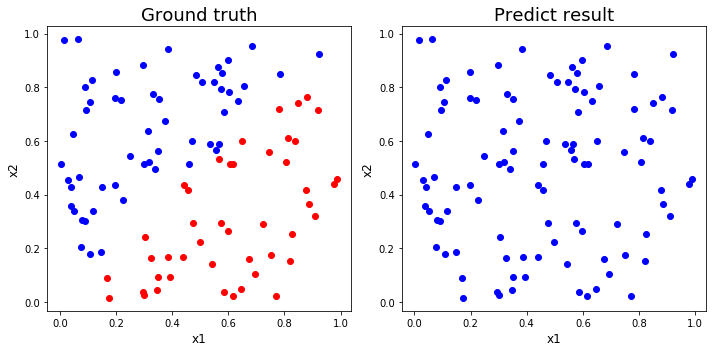

ValueError: x and y must have same first dimension, but have shapes (30,) and (300,)

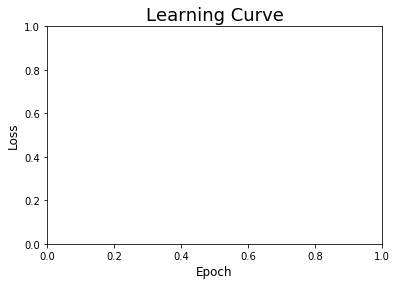

In [34]:
# Linear training 
iter = 150000
seed = 10
x_train_linear, y_train_linear = generate_linear(100, seed)
parameters_linear, costs_linear, accs_linear, test_costs_linear, test_accs_linear = model(x_train_linear, y_train_linear, 10, 10, iter=iter, lr=0.01, linear=True)
*_, y_pred_linear = forward(x_train_linear, parameters_linear)
# print(y_pred_linear)
show_result(x_train_linear, y_train_linear, y_pred_linear)
plot_loss(iter, 5000, costs_linear, test_costs_linear)
plot_acc(iter, 5000, accs_linear, test_accs_linear)

epoch 0 training loss : 1.617000739322501 acc : 0.23809523809523808, testing loss : 9.301644541093335 acc : 0.08196721311475409


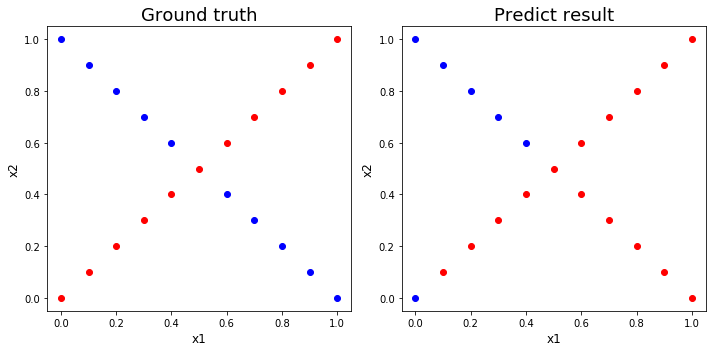

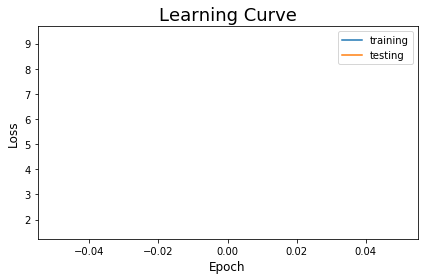

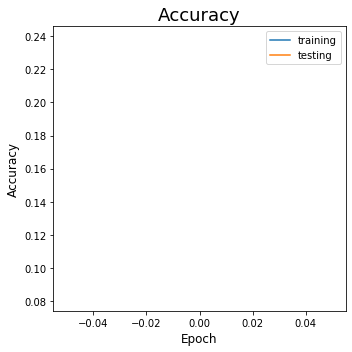

In [43]:
iter = 300000
seed = 10
x_train_xor, y_train_xor = generate_XOR_easy(10)
parameters_xor, costs_xor, accs_xor, test_costs_xor, test_accs_xor = model(x_train_xor, y_train_xor, 10, 10, iter=iter, lr=0.01, xor=True)
*_, y_pred_xor = forward(x_train_xor, parameters_xor)
# print(y_pred_linear)
show_result(x_train_xor, y_train_xor, y_pred_xor)
plot_loss(iter, 5000, costs_xor, test_costs_xor)
plot_acc(iter, 5000, accs_xor, test_accs_xor)

In [ ]:
# linear test
seed = np.random.randint(low=0, high=10000, size=1)
x_test, y_test = generate_linear(1000, seed)
*_, y_pred = forward(x_test, parameters_linear)
print("acc:", accuracy(x_test, y_test, y_pred))
# show_result(x_test, y_test, y_pred)

In [ ]:
# xor test
x_test, y_test = generate_XOR_easy(100)
*_, y_pred = forward(x_test, parameters_xor)
print("acc:", accuracy(x_test, y_test, y_pred))
show_result(x_test, y_test, y_pred)